In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/test-ml/crop_recommendation.csv')

In [ ]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


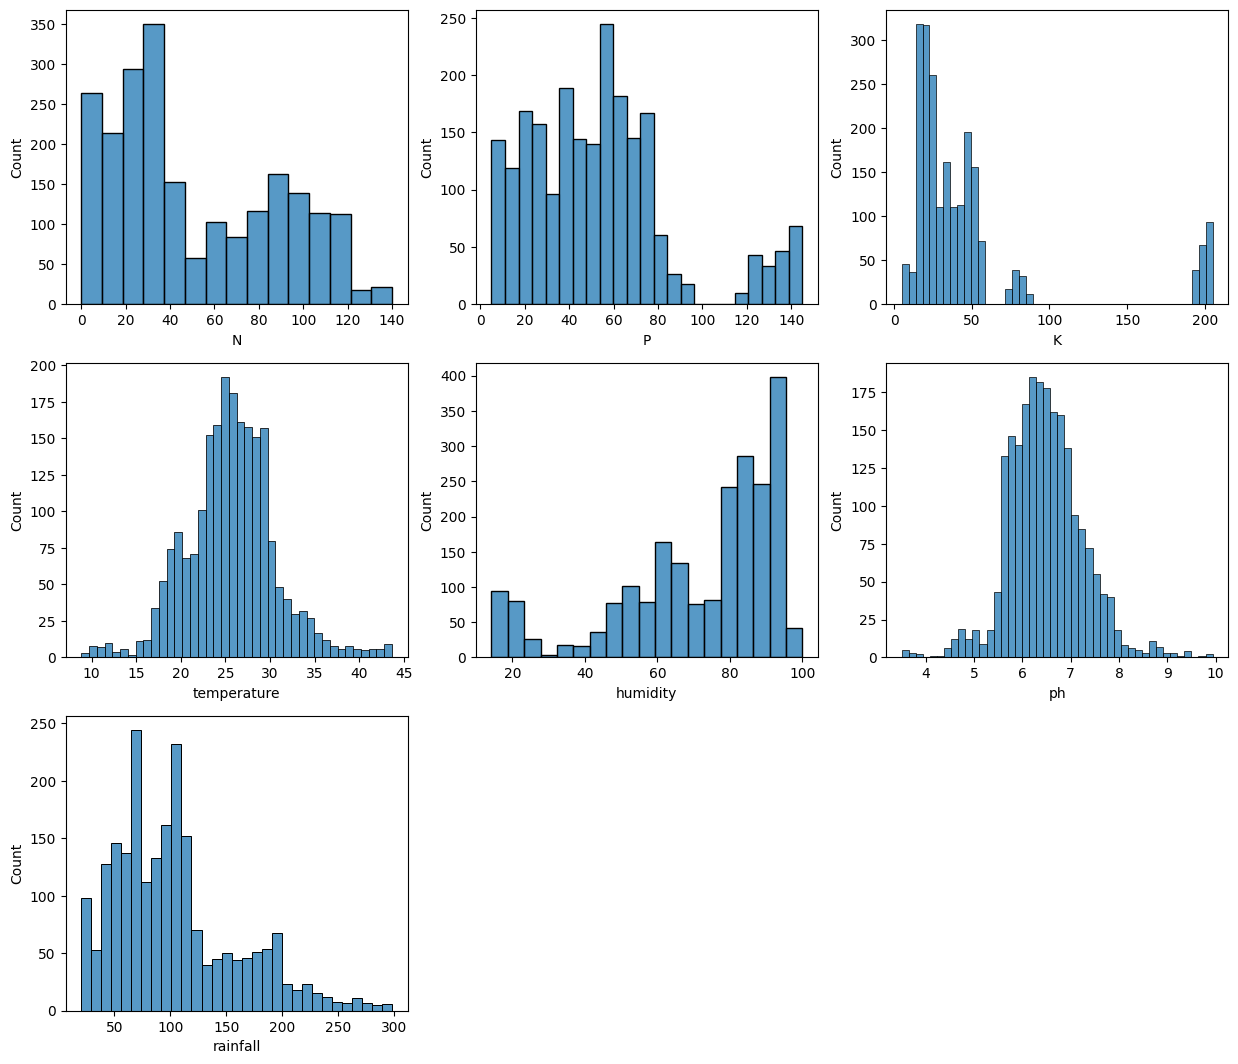

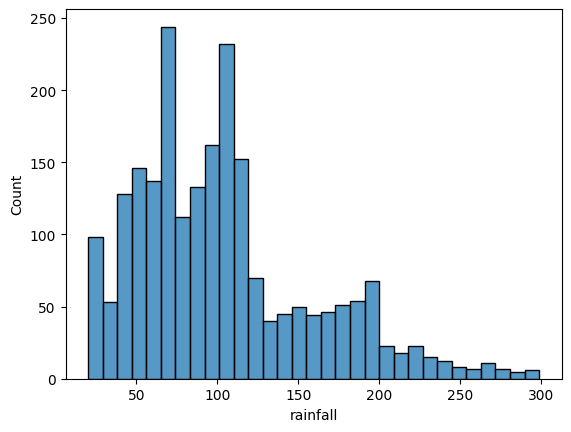

In [ ]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

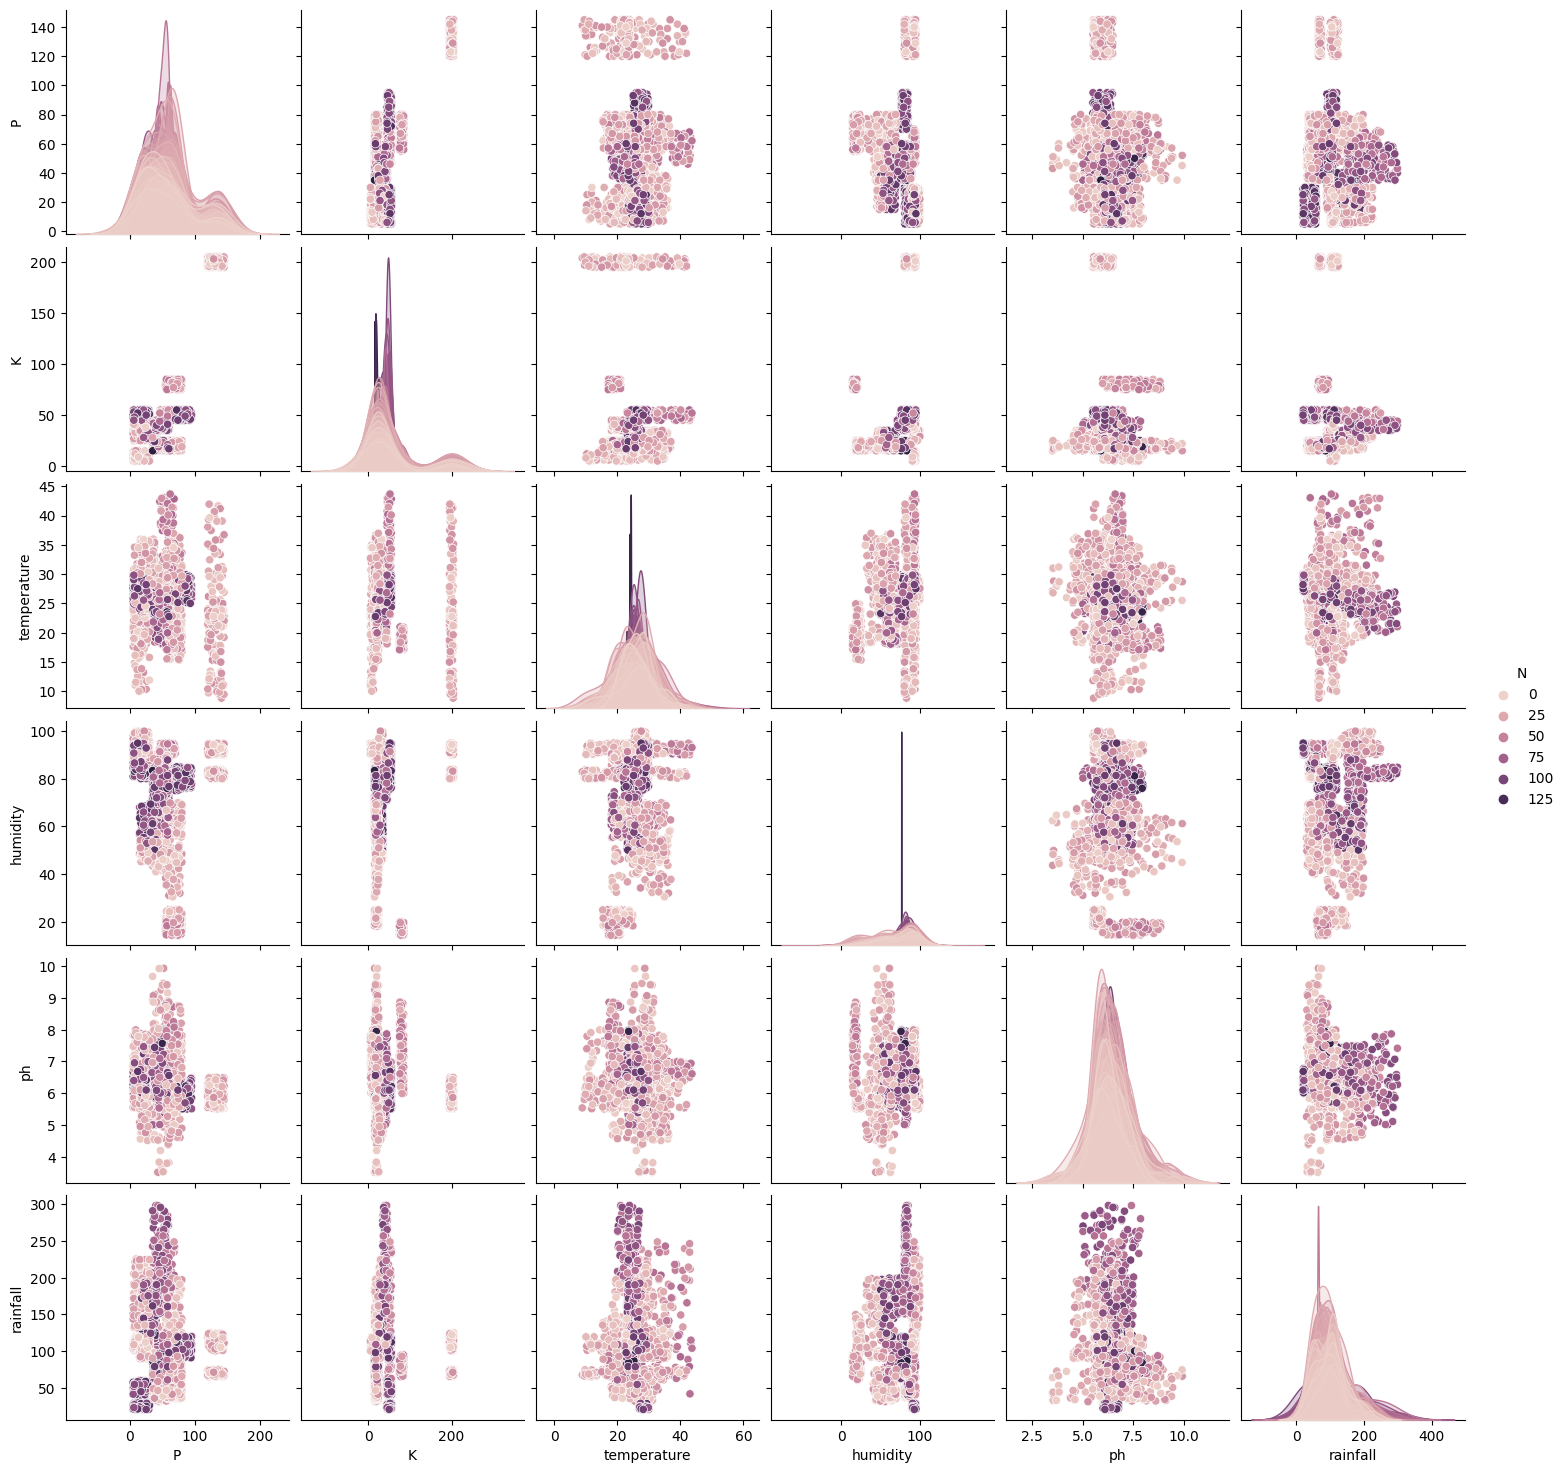

In [ ]:
plot_x_by_y = sns.pairplot(df, hue='N')

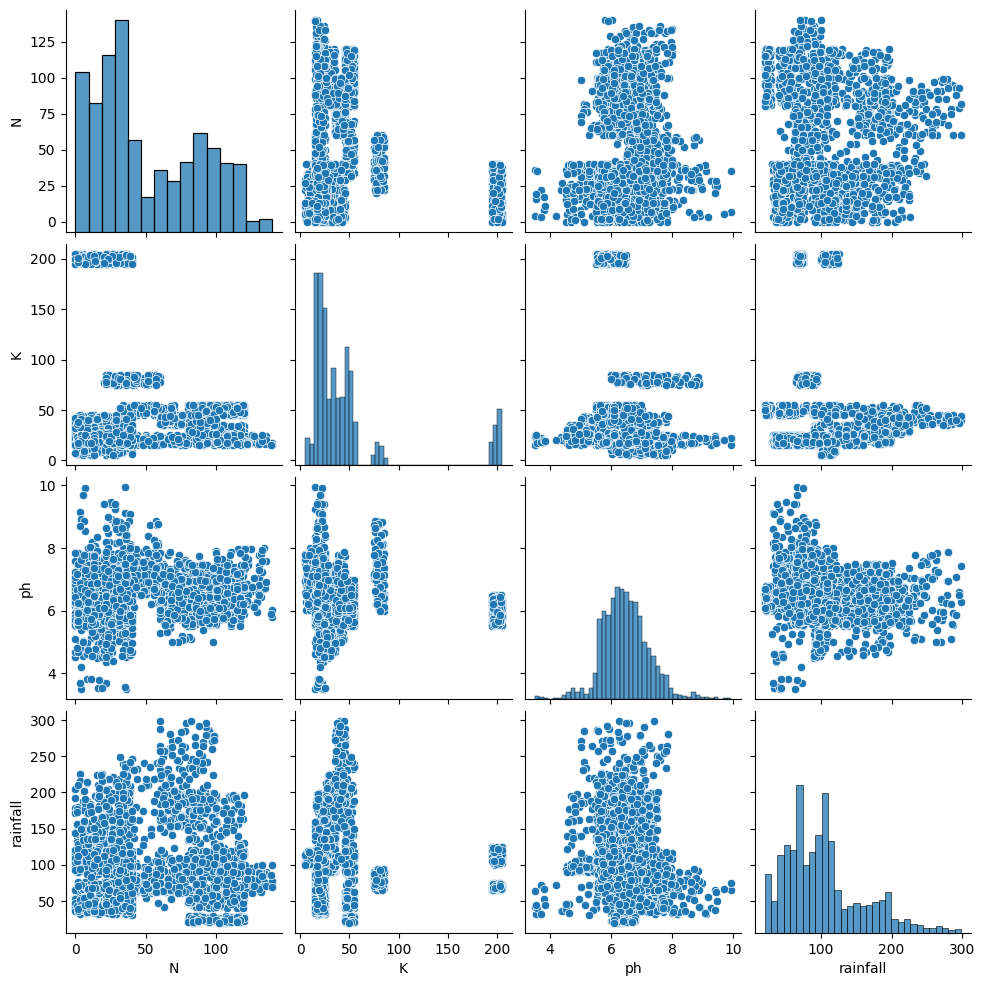

In [ ]:
features_pair = ['N','K','ph','rainfall']
plot_x_by_y = sns.pairplot(df[features_pair])

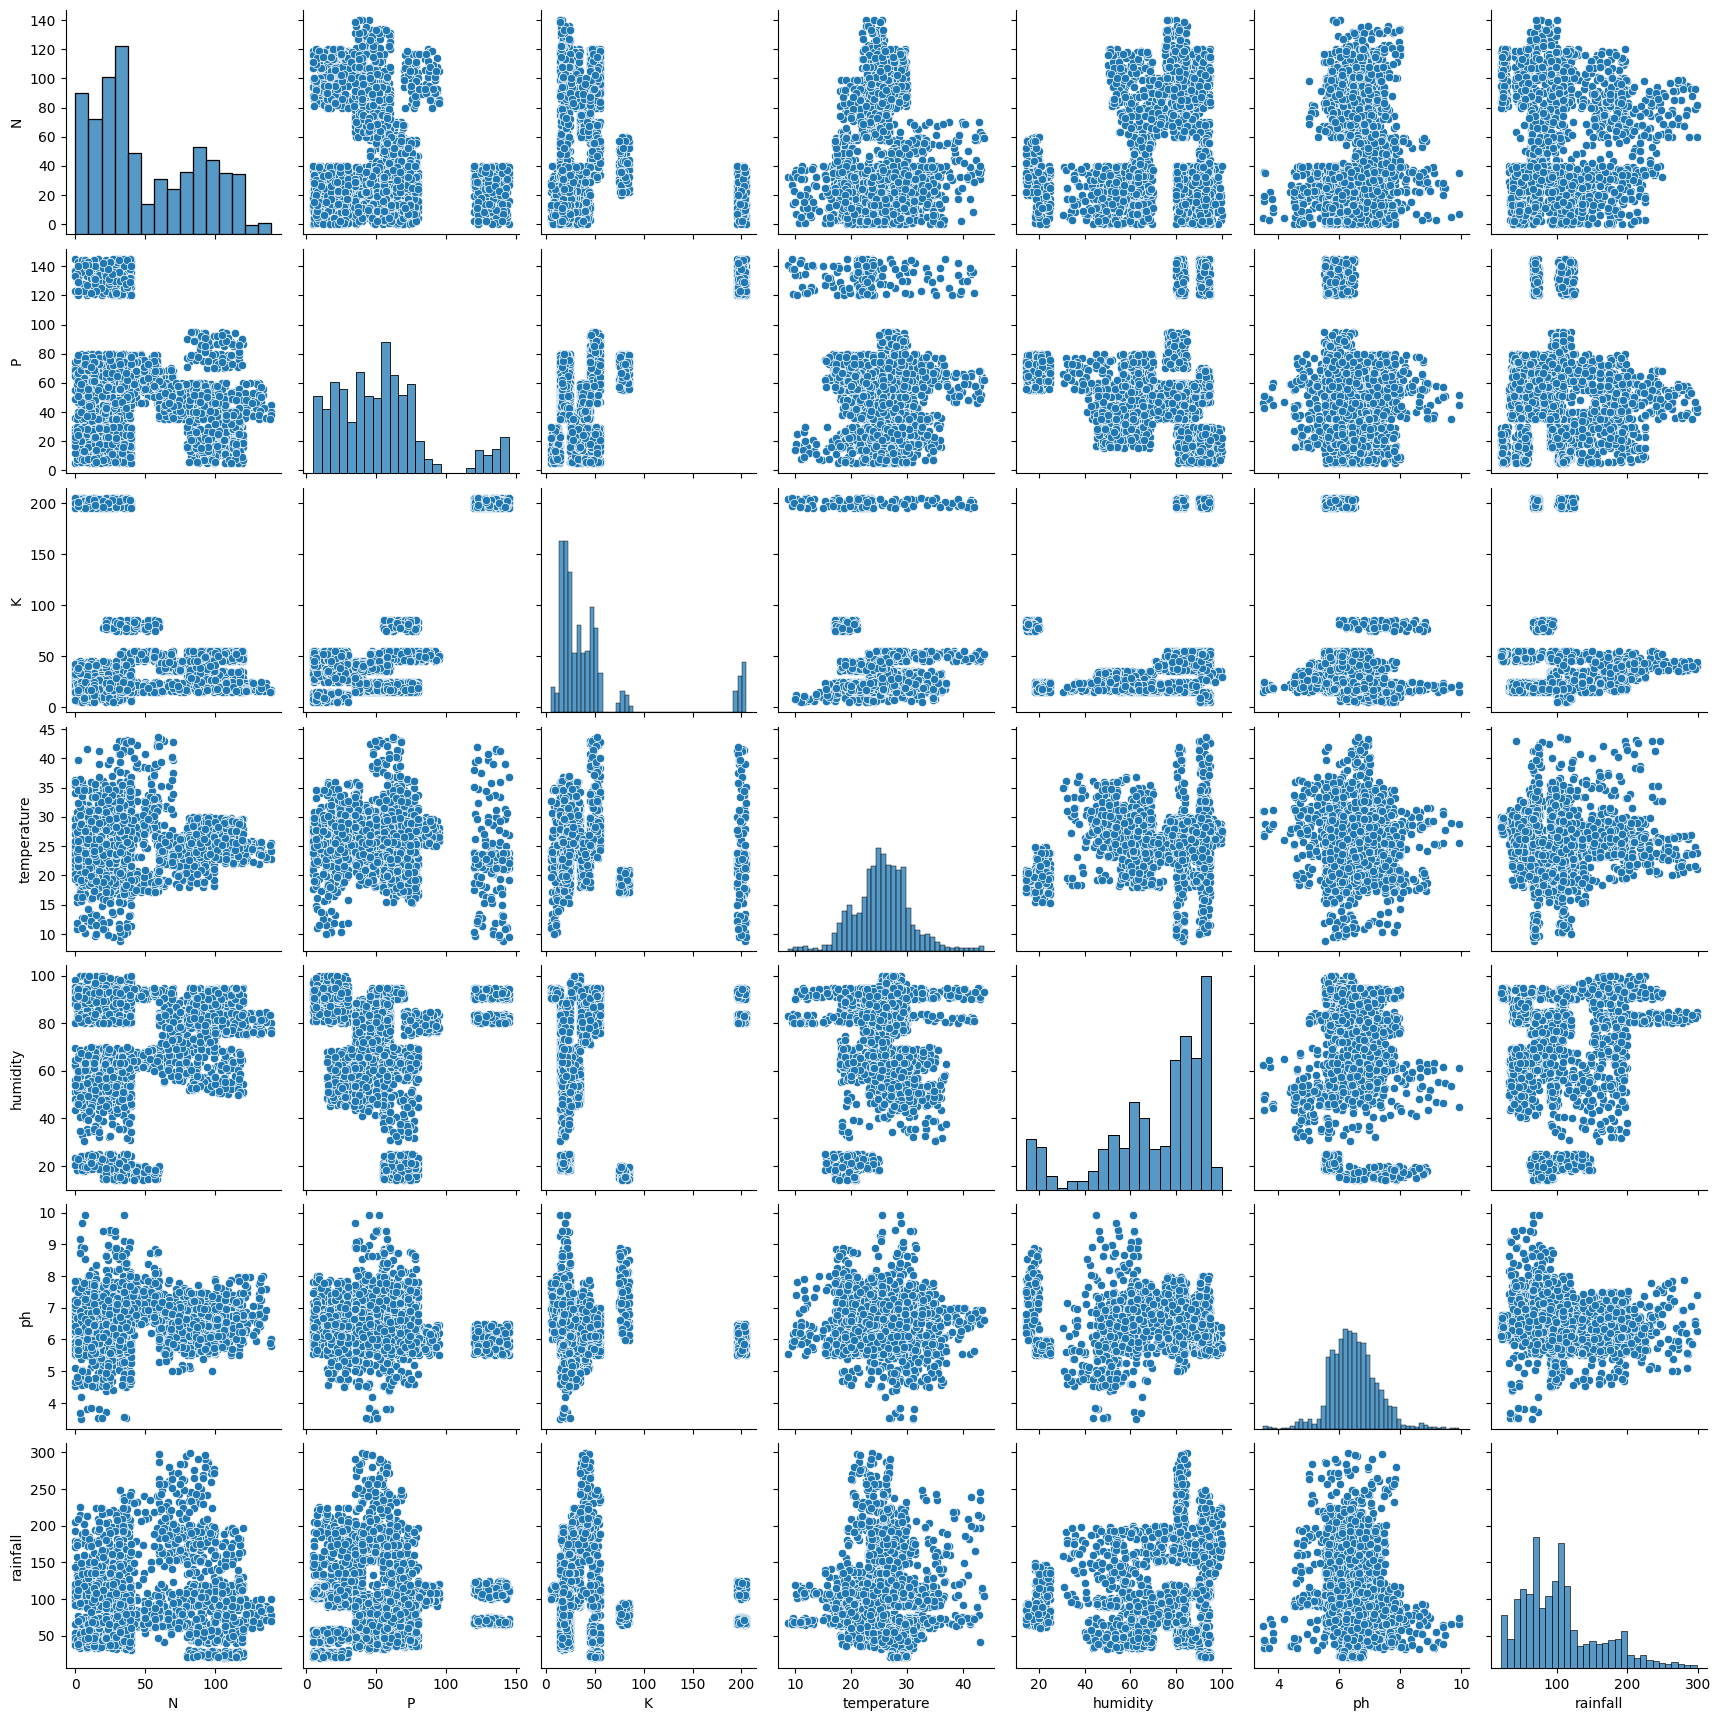

In [ ]:
plot_x_by_y = sns.pairplot(df)

<Axes: >

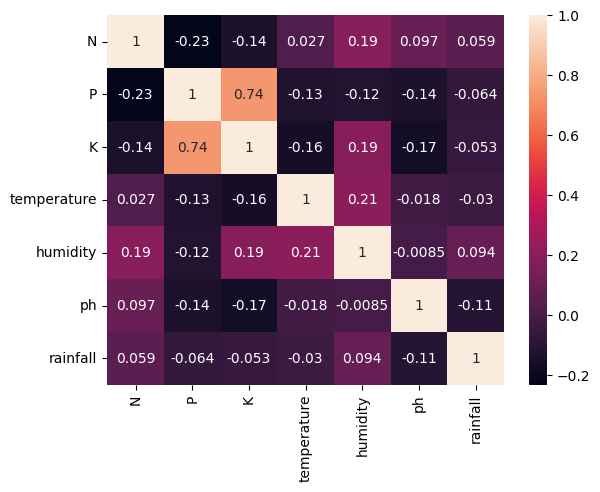

In [ ]:
sns.heatmap(df.corr(),annot=True)

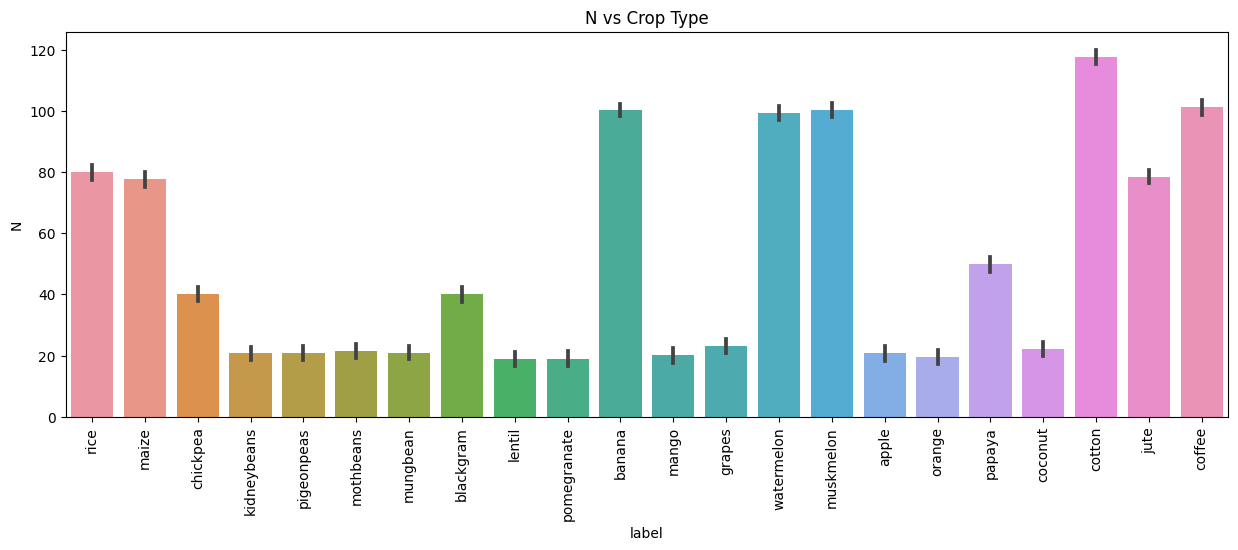

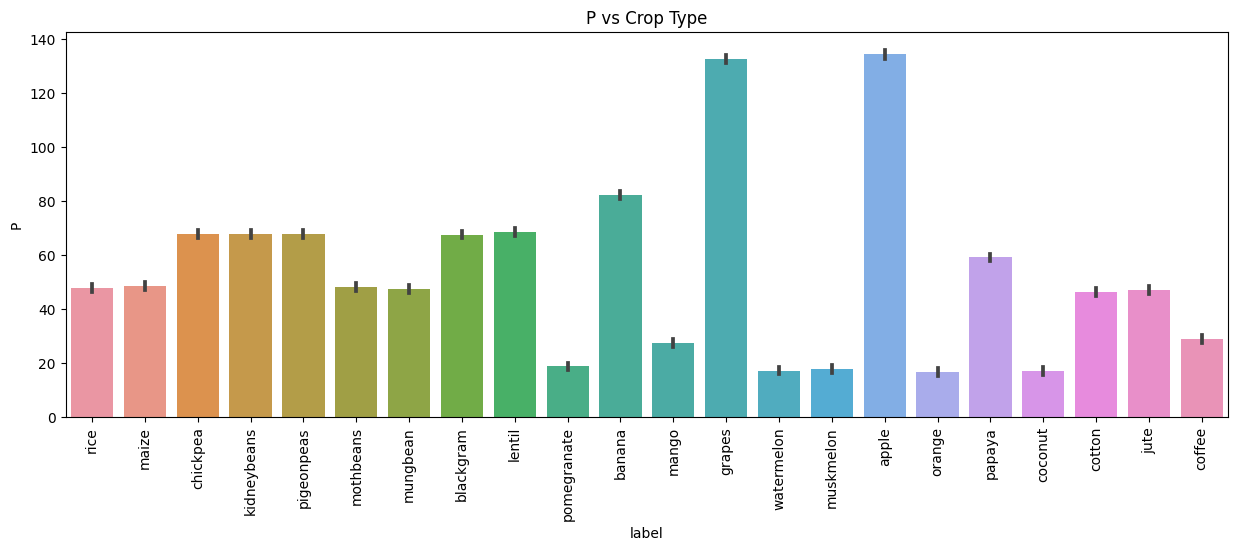

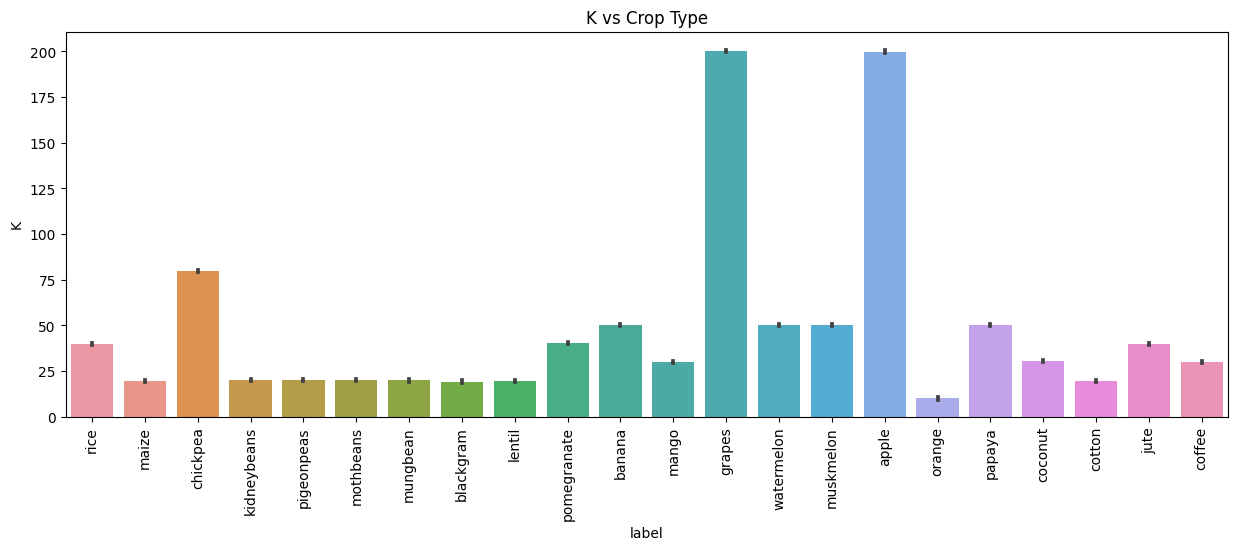

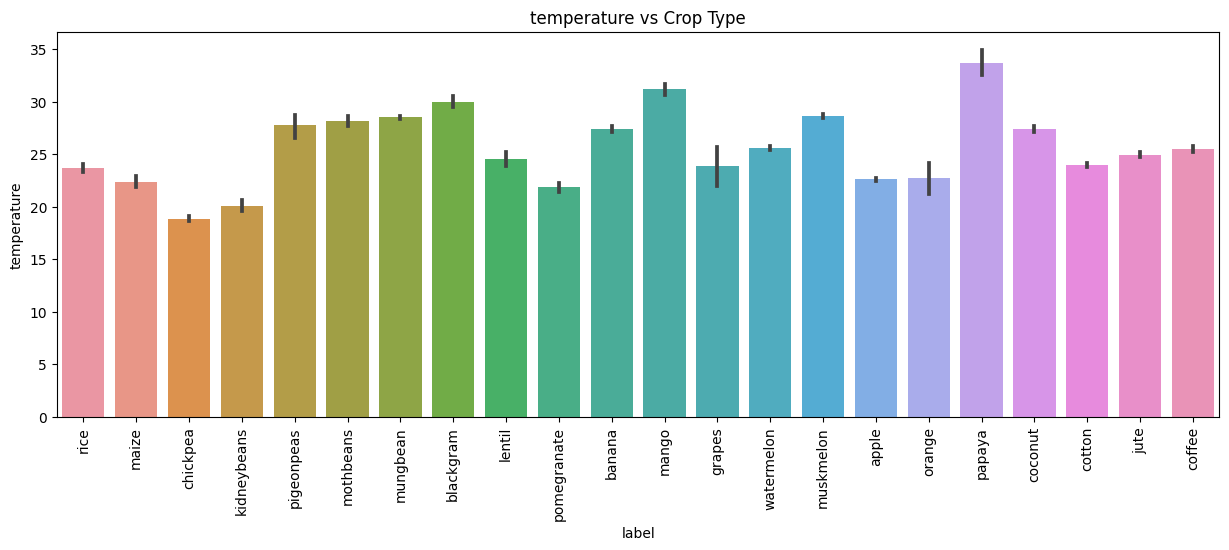

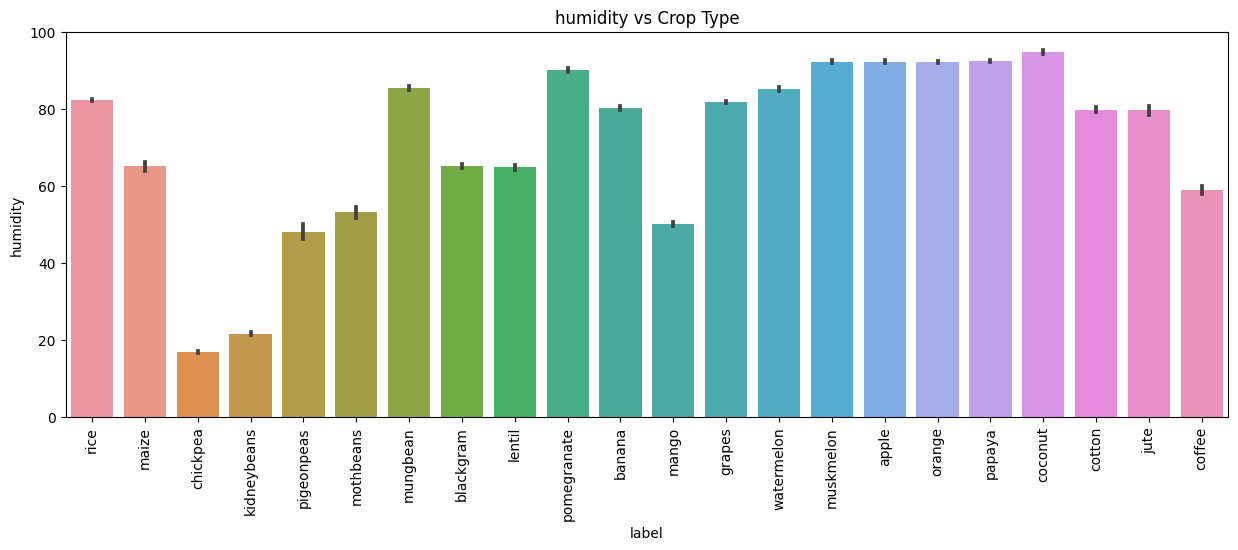

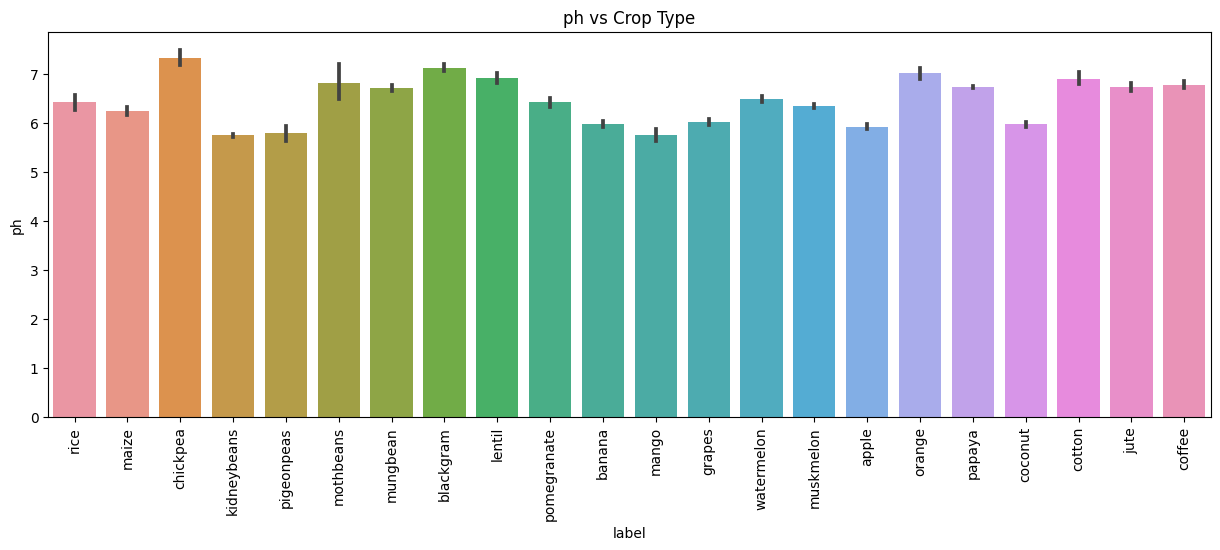

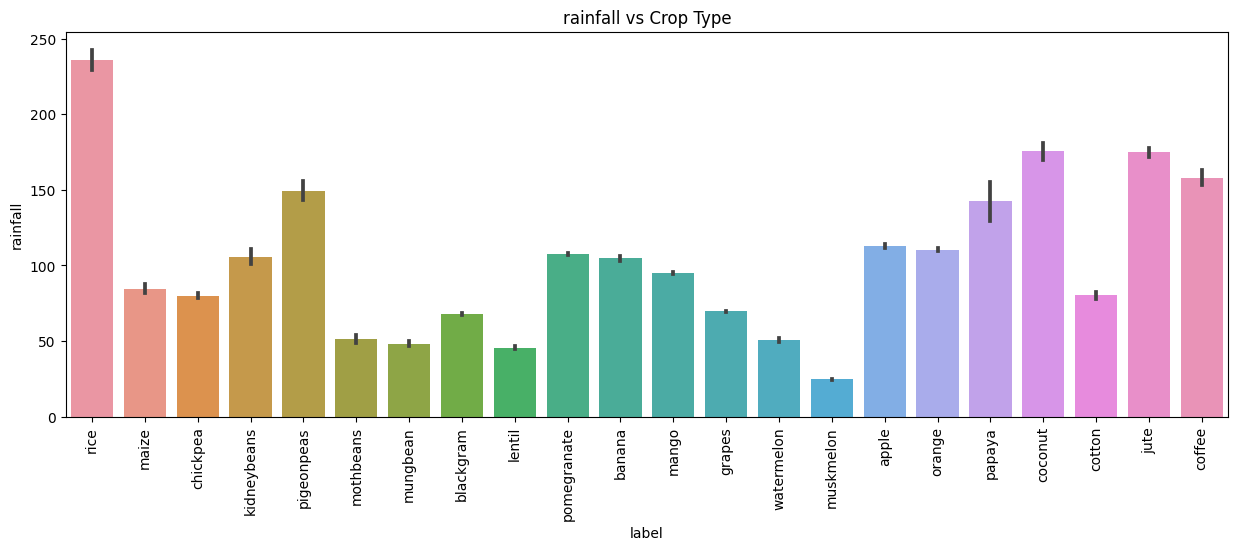

In [ ]:
for column in all_columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x = "label", y = column, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [ ]:
df  = shuffle(df,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


### Seperating features and target label

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        22
   blackgram       0.74      0.95      0.83        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        16
      coffee       1.00      0.93      0.97        15
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        21
        jute       1.00      0.26      0.41        27
 kidneybeans       1.00      0.81      0.90        16
      lentil       0.96      0.83      0.89        29
       maize       0.84      1.00      0.91        26
       mango       1.00      0.86      0.93        22
   mothbeans       0.69      0.58      0.63        19
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.9       , 0.93636364, 0.92954545, 0.91818182, 0.93636364])

### Saving trained Decision Tree model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        21
        jute       0.96      0.96      0.96        27
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00 

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99090909, 0.98863636, 0.99772727, 0.99545455])

### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        16
      coffee       1.00      0.93      0.97        15
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        21
        jute       0.80      0.89      0.84        27
 kidneybeans       0.94      1.00      0.97        16
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.0

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98863636, 0.97727273, 0.98409091, 0.98409091, 0.97954545])

In [ ]:
#Saving trained SVM model

In [ ]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        22
   blackgram       0.84      0.76      0.80        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      0.94      0.97        16
      coffee       1.00      1.00      1.00        15
      cotton       0.95      1.00      0.97        18
      grapes       1.00      1.00      1.00        21
        jute       0.82      0.85      0.84        27
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.93      0.93      0.93        29
       maize       0.96      0.96      0.96        26
       mango       1.00      1.00      1.00        22
   mothbeans       0.81      0.89      0.85        19
    mungbean       1.00      0.94      0.97        18
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.97045455, 0.93636364, 0.96136364, 0.96136364, 0.95909091])

### Saving trained Logistic Regression model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        21
        jute       0.93      0.96      0.95        27
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      0.97      0.98        29
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        22
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00 

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99090909, 0.99318182, 0.99772727, 0.99545455])

### Saving trained Random Forest model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
Ytrain

1934         cotton
303     kidneybeans
299        chickpea
2010           jute
682        mungbean
           ...     
1615         orange
1155          mango
1143          mango
471      pigeonpeas
1135          mango
Name: label, Length: 1760, dtype: object

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

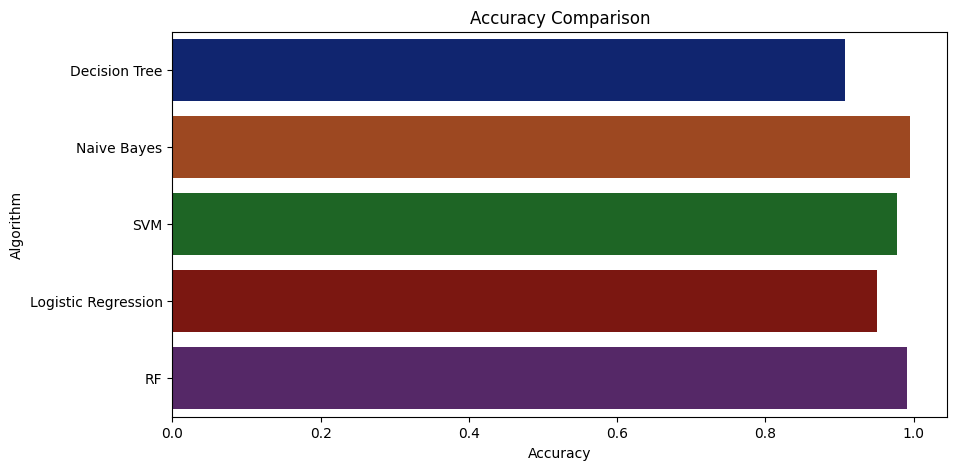

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9068181818181819
Naive Bayes --> 0.9954545454545455
SVM --> 0.9772727272727273
Logistic Regression --> 0.95
RF --> 0.990909090909091


## Making a prediction

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
